In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from statistics import mean

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def myscatter(x, y, name):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    fig=plt.figure(figsize=(6, 4))
    ax=fig.add_subplot(111)
    ax.scatter(x,y,alpha=0.5,color="Blue",linewidths="1")
    y2 = slope * x + intercept
    ax.plot(x, y2,color='black')
    ax.set_title(name + '\n y=' + "{0:9.2e}".format(slope) + "x + " + "{0:9.2e}".format(intercept) +
                           '\n R=' + "{0:9.2e}".format(r_value))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    plt.tight_layout()

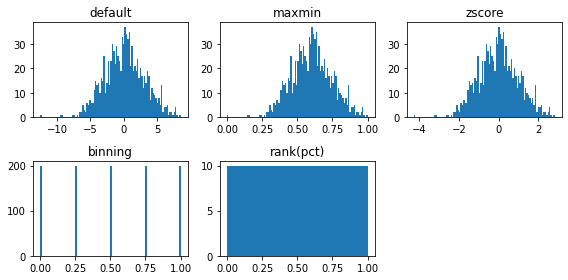

In [3]:
# 分布の比較
size = 1000
corr = 0.1
sigma = 3
x = np.random.normal(0, sigma, size)
y = corr * x + (1 - corr ** 2) ** 0.5 * np.random.normal(0, sigma, size)

x_maxmin = (x - x.min())/(x.max() - x.min())
y_maxmin = (y - y.min())/(y.max() - y.min())
x_zscore = stats.zscore(x)
y_zscore = stats.zscore(y)
x_binned = np.array(pd.qcut(x, 5, labels = [0, 0.25, 0.5, 0.75, 1.0]))
y_binned = np.array(pd.qcut(y, 5, labels = [0, 0.25, 0.5, 0.75, 1.0]))
x_ranked = pd.Series(x).rank(pct=True).values
y_ranked = pd.Series(y).rank(pct=True).values

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title("default")
ax1.hist(x, bins=100)

ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title("maxmin")
ax2.hist(x_maxmin,bins=100)

ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title("zscore")
ax3.hist(x_zscore,bins=100)

ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title("binning")
ax4.hist(x_binned,bins=100)

ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title("rank(pct)")
ax5.hist(x_ranked,bins=100)

fig.tight_layout()
fig.show()

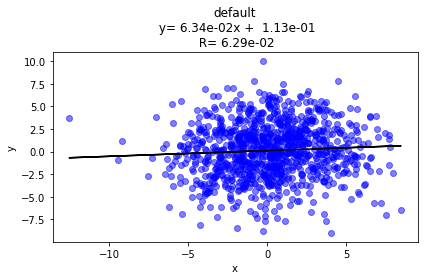

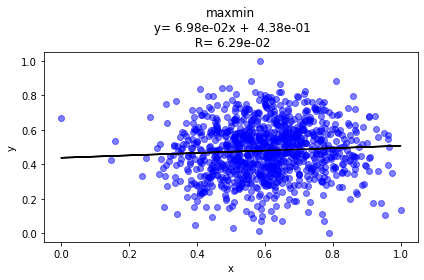

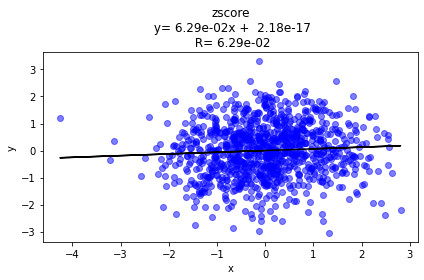

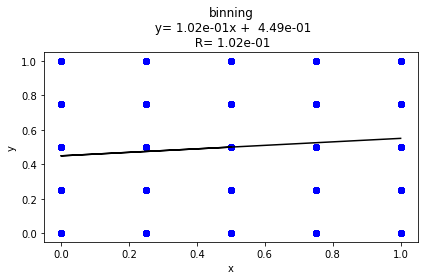

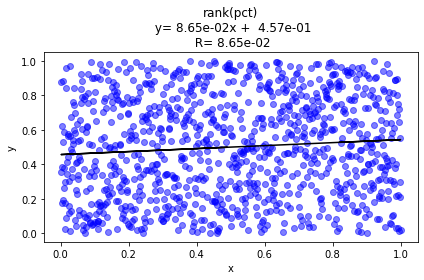

In [4]:
myscatter(x, y, "default")
myscatter(x_maxmin, y_maxmin, "maxmin")
myscatter(x_zscore, y_zscore, "zscore")
myscatter(x_binned, y_binned, "binning")
myscatter(x_ranked, y_ranked, "rank(pct)")

In [6]:
# モンテカルロ
size = 1000
corr = 0.1
sigma = 3

profits_default = []
sharps_default = []
profits_maxmin = []
sharps_maxmin = []
profits_zscore = []
sharps_zscore = []
profits_binned = []
sharps_binned = []
profits_ranked = []
sharps_ranked = []
for i in range(2000):
  x = np.random.normal(0, sigma, size)
  z = np.random.normal(0, sigma, size)
  y = corr * x + (1 - corr ** 2) ** 0.5 * z
  slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  pred_y = x * slope + intercept
  ret = y
  ret = np.where(pred_y >= 0, ret, -ret)
  total_profit = ret.sum()
  sharp = ret.mean()/ret.std()
  profits_default.append(total_profit)
  sharps_default.append(sharp)

  x_maxmin = (x - x.min())/(x.max() - x.min())
  y_maxmin = (y - y.min())/(y.max() - y.min())
  slope, intercept, r_value, p_value, std_err = stats.linregress(x_maxmin, y_maxmin)
  pred_y = x_maxmin * slope + intercept
  ret = y
  ret = np.where(pred_y >= 0.5, ret, -ret)
  total_profit = ret.sum()
  sharp = ret.mean()/ret.std()
  profits_maxmin.append(total_profit)
  sharps_maxmin.append(sharp)

  x_zscore = stats.zscore(x)
  y_zscore = stats.zscore(y)
  slope, intercept, r_value, p_value, std_err = stats.linregress(x_zscore, y_zscore)
  pred_y = x_zscore * slope + intercept
  ret = y
  ret = np.where(pred_y >= 0, ret, -ret)
  total_profit = ret.sum()
  sharp = ret.mean()/ret.std()
  profits_zscore.append(total_profit)
  sharps_zscore.append(sharp)
  
  x_binned = np.array(pd.qcut(x, 5, labels = [0, 0.25, 0.5, 0.75, 1.0]))
  y_binned = np.array(pd.qcut(y, 5, labels = [0, 0.25, 0.5, 0.75, 1.0]))
  #x_binned = np.array(pd.cut(x, 5, labels = [0, 0.25, 0.5, 0.75, 1.0]))
  #y_binned = np.array(pd.cut(y, 5, labels = [0, 0.25, 0.5, 0.75, 1.0]))
  slope, intercept, r_value, p_value, std_err = stats.linregress(x_binned, y_binned)
  pred_y = x_binned * slope + intercept
  ret = y
  ret = np.where(pred_y >= 0.5, ret, -ret)
  total_profit = ret.sum()
  sharp = ret.mean()/ret.std()
  profits_binned.append(total_profit)
  sharps_binned.append(sharp)

  x_ranked = pd.Series(x).rank(pct=True).values
  y_ranked = pd.Series(y).rank(pct=True).values
  slope, intercept, r_value, p_value, std_err = stats.linregress(x_ranked, y_ranked)
  pred_y = x_ranked * slope + intercept
  ret = y
  ret = np.where(pred_y >= 0.5, ret, -ret)
  total_profit = ret.sum()
  sharp = ret.mean()/ret.std()
  profits_ranked.append(total_profit)
  sharps_ranked.append(sharp)

print("default: S/R=", mean(sharps_default))
print("maxmin: S/R=", mean(sharps_maxmin))
print("zscore: S/R=", mean(sharps_zscore))
print("binning: S/R=", mean(sharps_binned))
print("rank: S/R=", mean(sharps_ranked))

default: S/R= 0.0853828142877999
maxmin: S/R= 0.033734513584334644
zscore: S/R= 0.0810827241362867
binning: S/R= 0.07822368563863577
rank: S/R= 0.08113000766603759


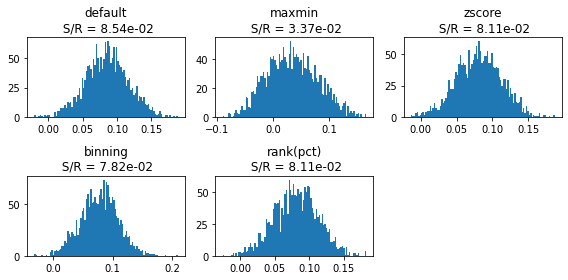

In [7]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title("default" + '\n S/R =' + "{0:9.2e}".format(mean(sharps_default)))
ax1.hist(sharps_default, bins=100)
#ax1.hist(profits_default, bins=100)

ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title("maxmin" + '\n S/R =' + "{0:9.2e}".format(mean(sharps_maxmin)))
ax2.hist(sharps_maxmin,bins=100)
#ax2.hist(profits_maxmin, bins=100)

ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title("zscore" + '\n S/R =' + "{0:9.2e}".format(mean(sharps_zscore)))
ax3.hist(sharps_zscore,bins=100)
#ax3.hist(profits_zscore, bins=100)

ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title("binning" + '\n S/R =' + "{0:9.2e}".format(mean(sharps_binned)))
ax4.hist(sharps_binned,bins=100)
#ax4.hist(profits_binned, bins=100)

ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title("rank(pct)" + '\n S/R =' + "{0:9.2e}".format(mean(sharps_ranked)))
ax5.hist(sharps_ranked,bins=100)
#ax5.hist(profits_ranked, bins=100)

fig.tight_layout()
fig.show()